# Outage probability in OFDMA protocol

In [124]:
import numpy as np
import matplotlib.pyplot as plt

C=200
W=250
K=10**6
gamma = 2.8
R = 300
lmb = 0.01
SINR_min = 0.1
p=0.01
S_min = 30
S_max = 100

1. 

We denote $U$, the number of users that's represented by a Poisson process of intensity measure $\lambda $ $dx$. 

Then we denote $U_p$, the number of active users in a time slot.

By construction $U_p$ is the thinned process of $U$, then it's a Poisson process of intensity measure $p\lambda$ $dx$.

2.

We have to compute $\mathbb{E}[U_p(C_R)]$, where $C_R = \{(x,y) | x^2  + y^2 \leq R^2\}$.

\begin{align*}

\mathbb{E}[U_p(C_R)] & = \mathbb{E}[\int_{0}^R p \lambda 2 \pi x \,dx] \\

\mathbb{E}[U_p(C_R)] & = \mathbb{E}[p \lambda  \pi R^2] \\

\mathbb{E}[U_p(C_R)] & = p \lambda  \pi R^2 \\

\end{align*}

3.
We denote $D_k = \{x | N(x) = k\}$


Let $k$ be in $[\![2;N_{max}]\!]$ and $x$ in $\mathbb{R^+}$ s.t. $N(x) = k$ and $K {\|x\|}^{-\gamma} > SNR_{min}$

So if $x$ is in $D_k$ we have : 

\begin{align*}

\frac{W(k-1)}{C} < &\frac{1}{ \log _2\left(1+\frac{K}{\|x\ ^\gamma}\right)} \leq \frac{Wk}{C} \\

\frac{C}{Wk} \leq  &\log _2\left(1+\frac{K}{\|x\|^\gamma}\right) < \frac{C}{W(k-1)} \\

2^\frac{C}{Wk} \leq  &1+\frac{K}{\|x\|^\gamma} < 2^\frac{C}{W(k-1)} \\

\frac{K}{2^\frac{C}{W(k-1)}-1}  <  &\|x\|^\gamma \leq \frac{K}{2^\frac{C}{Wk} -1} \\

\end{align*}

So we have $D_k =\{ x   |   (\frac{K}{2^\frac{C}{W(k-1)}-1}) ^{\frac{1}{\gamma}}< \|x\| \leq (\frac{K}{2^\frac{C}{Wk} -1})^{\frac{1}{\gamma}} \}$

If $k=1$ we find that $D_1 = \{ x   |   0 < \|x\| \leq (\frac{K}{2^\frac{C}{W} -1})^{\frac{1}{\gamma}} \}$

Geometrically, the subset of the cell in wich all customers require k subcarriers is a ring.




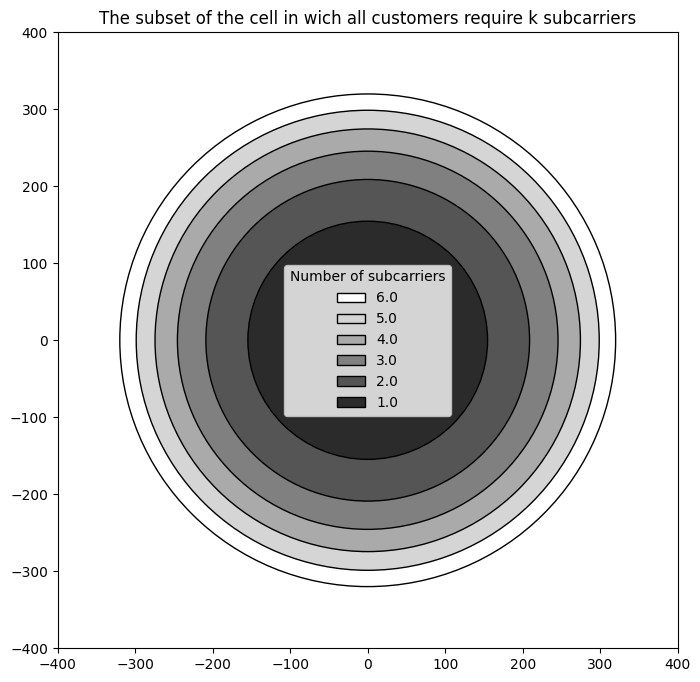

6.0


In [125]:
N_max = np.ceil(C/(W*np.log2(1+SINR_min)))

def rayon(k):
    return (K/((2**(C/(W*k))-1)))**(1/gamma)



ax = plt.gca()
ax.figure.set_size_inches(8,8)
ax.set_xlim((-400,400))
ax.set_ylim((-400,400))
for k in np.arange(N_max,0,-1):
    circle = plt.Circle((0,0),rayon(k),linewidth=1,facecolor=str(k/6),edgecolor='k',label=str(k))
    ax.add_patch(circle)
    ax.legend(title="Number of subcarriers")
ax.set_title("The subset of the cell in wich all customers require k subcarriers")
plt.show()

print(N_max)


We know that the zone in wich users requiring $3$ subcarriers is $D_3$.

We know that $A_3 = U_p(D_3) \sim \mathcal{P} (\int_{D_3}p \lambda  \,dx)$

So we have $A_3 \sim \mathcal{P} (p\lambda\pi K^{\frac{2}{\gamma}} (  \frac{1}{(2^\frac{C}{3W} -1)^{\frac{2}{\gamma}}} -  \frac{1}{(2^\frac{C}{2W}-1)^{\frac{2}{\gamma}} }))$.


5.

Theoricaly, $A_3 \sim \mathcal{P}$, so we know the theoric formula of the cumulative distribution function of $A_3$. 

Then we can use the Kolmogorov-Smirnov test.

Indeed in order to estimate the cumulative distribution of $A_3$, we generate sample from the Poisson Process $U_p$ then compute $A_3$, with this formula : $U_p(D_3)$, finally it's just a MC method.


6.

We have : 

\begin{align*}

F(\phi) & = \sum_{x \in \phi} N(x) \\

F(\phi) & = \sum_{k=1}^{N_{max}}  \sum_{x \in \phi} N(x) \mathbb{1}_{N(x)=k} \\

F(\phi) & = \sum_{k=1}^{N_{max}}  \sum_{x \in \phi} k \mathbb{1}_{N(x)=k} \\

F(\phi) & = \sum_{k=1}^{N_{max}} k \sum_{x \in \phi}  \mathbb{1}_{N(x)=k} \\

F(\phi) & = \sum_{k=1}^{N_{max}} k \  card(\{ x \in \phi | N(x) = k\}) \\

F(\phi) & = \sum_{k=1}^{N_{max}} k \  U_p(D_k) \\

\end{align*}

We denote $\zeta _ k = U_p(D_k)$, by construction $(\zeta _ k)$ are independent r.v.

And $\zeta_k \sim \mathcal{P} (p\lambda\pi K^{\frac{2}{\gamma}} (  \frac{1}{(2^\frac{C}{kW} -1)^{\frac{2}{\gamma}}} -  \frac{1}{(2^\frac{C}{(k-1)W}-1)^{\frac{2}{\gamma}} }))$.

Then we have : $$F(\phi)  = \sum_{k=1}^{N_{max}} k \  \zeta_k $$

7.

$$\mathbf{E}[e^{\theta X_\mu}] = \sum_{k=0}^{+\infty} e^{\theta k} \frac{\mu^k e^{-\mu}}{k!}$$

Then with the Taylor's series we have : $$\mathbf{E}[e^{\theta X_\mu}] = e^{\mu(e^\theta -1)}$$

We have : $e^{-K \mu \theta}\mathbf{E}[e^{\theta X_\mu}] =e^{-K \mu \theta + \mu(e^\theta -1)}$.

with a simple function study we find that the derivative according to $\theta$ vanishes for $\theta' = ln(K)$
So we will admit that $K>1$ in order to respect the condition $\theta > 0$

And the object we want to minimise is a convex function, because it is an exponential of a convex function.

So the minimum is reach for $\theta '$ and we have : 

$$\min _{\theta>0} e^{-K \mu \theta} \mathbf{E}[e^{\theta X_\mu}] = (\frac{1}{K})^{K\mu} e^{\mu(K-1)}$$



8.

We have : 
$$\mathbf{P}(X_\mu \geq K \mu) \leq e^{-K_\mu \theta} \mathrm{E}[e^{\theta X_\mu}]$$
For any $\theta>0$, so we have : 
 $$\mathbf{P}(X_\mu \geq K \mu) \leq (\frac{1}{K})^{K\mu} e^{\mu(K-1)}$$

 So now let's find $K_\mu$ s.t. $e^{-K\mu\ ( ln(K) + 1) -\mu}\leq10^{-4}$.

 The left term converges to 0, so with this formula we see that for K big enough, it can be as small as we want.

9.


In [127]:
N_max = np.ceil(C/(W*np.log2(1+SINR_min)))

print("N_max = ",N_max)


N_max =  6.0


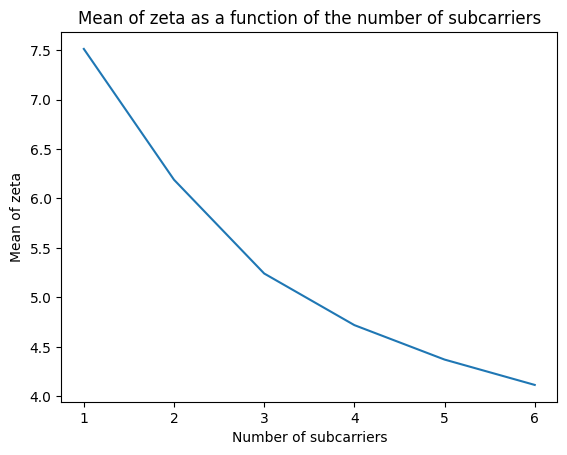

In [128]:
def zeta(k):
    if k==1: return p*lmb * np.pi * K**(2/gamma)*(1 / (2**(C/W)-1)** (2/gamma)) 
    return p*lmb * np.pi * K**(2/gamma)*(1/(2**(C/(W*k))-1)** (2/gamma) - 1 / (2**(C/((k-1)*W))-1)** (2/gamma))
i_tab = np.arange(1,N_max+1)
zeta_array = np.array([zeta(i) for i in i_tab])

plt.plot(i_tab,zeta_array)
plt.xlabel("Number of subcarriers")
plt.ylabel("Mean of zeta")
plt.title("Mean of zeta as a function of the number of subcarriers")
plt.show()


It's a little bit ambiguous, we don't know if it's $K_\mu$ or $K  \mu$

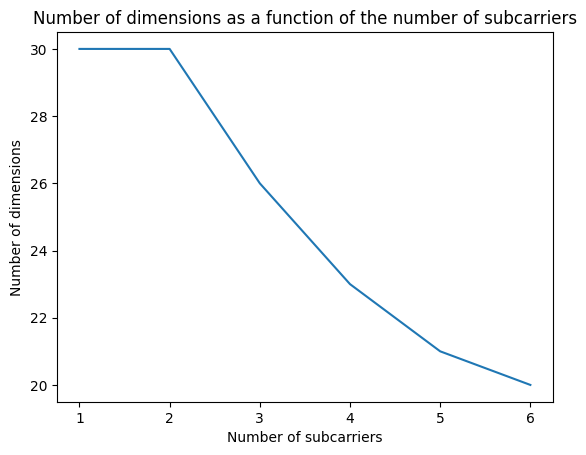

In [129]:
K=[]

treshold = 0.0001

def seuil(p,k):
    return np.exp(-k*p*(np.log(k)-1)-p)

for p in zeta_array:
    s=1
    k=1
    while s>treshold:
        s = seuil(p,k)
        k+=1
    K.append(int(k*p))

plt.plot(i_tab,K)
plt.xlabel("Number of subcarriers")
plt.ylabel("Number of dimensions")
plt.title("Number of dimensions as a function of the number of subcarriers")
plt.show()

In [130]:
K_max = np.max(K)

print("K_max = ",K_max)

K_max =  30


C:\Users\Witt\AppData\Local\Temp\ipykernel_16900\1917418204.py:2: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return np.exp(-p)*p**k/np.math.factorial(k)


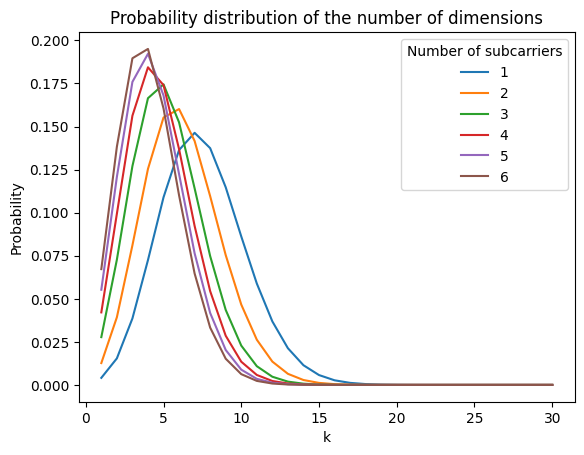

In [131]:
def poisson(p,k):
    return np.exp(-p)*p**k/np.math.factorial(k)

distrib_array_1 = []

for i in range(len(zeta_array)):
    tab=[]
    for j in range(1,K_max+1):
        tab.append(poisson(zeta_array[i],j))
    distrib_array_1.append(tab)

for i in range(len(distrib_array_1)):
    plt.plot(np.arange(1,K_max+1),distrib_array_1[i],label=str(i+1))
plt.xlabel("k")
plt.ylabel("Probability")
plt.title("Probability distribution of the number of dimensions")
plt.legend(title="Number of subcarriers")
plt.show()


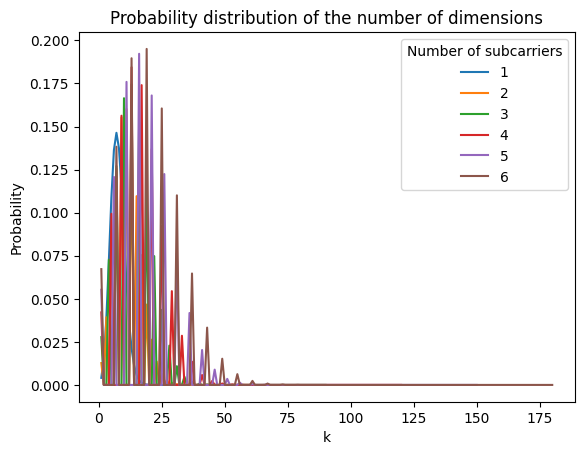

In [132]:
def translation_dist(dist,l):
    n = len(dist)
    dist_new = np.zeros(n*l)
    for i in range(n):
        dist_new[i*l] = dist[i]
    return dist_new

distrib_array_2 = []   
for i in range(len(distrib_array_1)):
    distrib_array_2.append(translation_dist(distrib_array_1[i],i+1))

for i in range(len(distrib_array_2)):
    plt.plot(np.arange(1,K_max*(i+1)+1),distrib_array_2[i],label=str(i+1))
plt.xlabel("k")
plt.ylabel("Probability")
plt.title("Probability distribution of the number of dimensions")
plt.legend(title="Number of subcarriers")
plt.show()


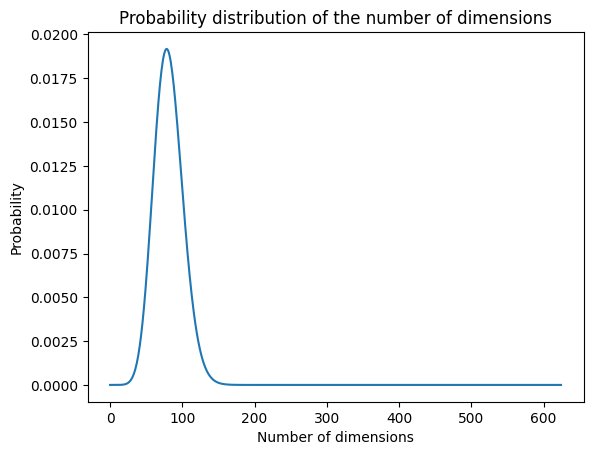

In [133]:
F_distrib = distrib_array_2[0]
for i in range(1,len(distrib_array_2)):
    F_distrib = np.convolve(F_distrib,distrib_array_2[i])

plt.plot(F_distrib)
plt.xlabel("Number of dimensions")
plt.ylabel("Probability")
plt.title("Probability distribution of the number of dimensions")
plt.show()


In [134]:
norm = np.sum(F_distrib)

print("Error of normalization : ",1-norm)

Error of normalization :  0.04501666773944579


We have a small error of normalization, so we are going to renomalize the density.

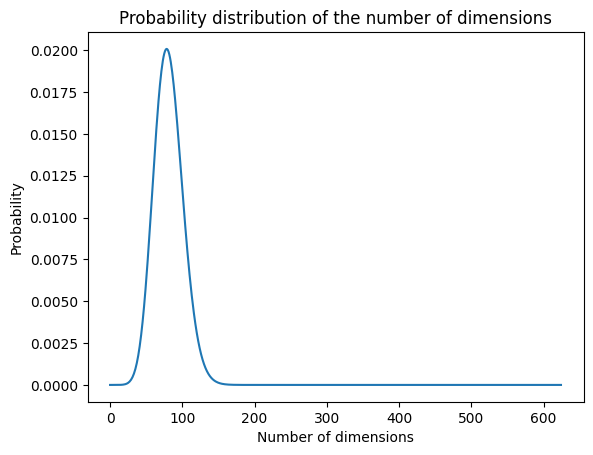

In [135]:
F_distrib = F_distrib/norm

plt.plot(F_distrib)
plt.xlabel("Number of dimensions")
plt.ylabel("Probability")
plt.title("Probability distribution of the number of dimensions")
plt.show()

10.

In [136]:
S=0
p=0

while p<1-0.01:
    p+=F_distrib[S]
    S+=1

print("S = ",S)

S =  132


To conclude, if we want enough slots, 132 will be enough 99.99% of the time.